In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

#### Keras to load the Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

#### Pre Processing

In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

#### Model Building

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2 = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300,activation="relu"),
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
    ]
)

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


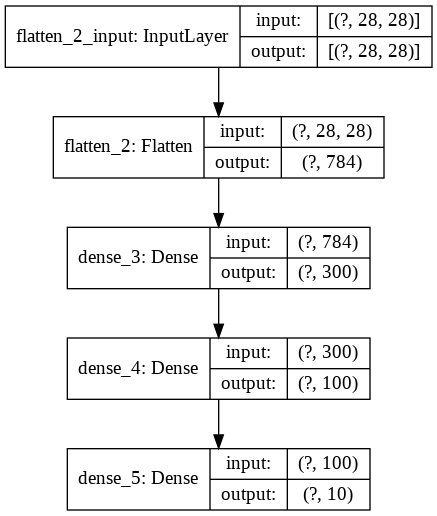

In [21]:
keras.utils.plot_model(model2,show_shapes=True) #Plotting the model

In [22]:
model.layers

In [0]:
hidden_1 = model.layers[1]

In [24]:
hidden_1.name

'dense'

In [26]:
model.get_layer('dense') is hidden_1

True

In [0]:
weights,biases = hidden_1.get_weights()

In [28]:
weights

array([[-0.05327387,  0.07081306,  0.0085429 , ...,  0.00347084,
        -0.01306613,  0.0389356 ],
       [-0.05377353, -0.06425396,  0.06079696, ..., -0.00684525,
        -0.06256616, -0.07157375],
       [ 0.02042533,  0.02139451,  0.00940296, ..., -0.03391153,
        -0.02912953,  0.04952586],
       ...,
       [-0.05080087, -0.00169989, -0.06764816, ..., -0.0268942 ,
         0.0120765 , -0.0687631 ],
       [-0.04578922, -0.07415459,  0.01154981, ..., -0.05338388,
        -0.05976841,  0.0107002 ],
       [-0.04409841, -0.07138021, -0.04321631, ..., -0.02526021,
         0.04517851,  0.05967279]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

#### Compiling the model

In [0]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

#### Training the Model

In [33]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.7101 - accuracy: 0.7677 - val_loss: 0.5059 - val_accuracy: 0.8352
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4887 - accuracy: 0.8306 - val_loss: 0.4515 - val_accuracy: 0.8448
Epoch 3/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4442 - accuracy: 0.8444 - val_loss: 0.4876 - val_accuracy: 0.8186
Epoch 4/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4143 - accuracy: 0.8554 - val_loss: 0.3948 - val_accuracy: 0.8688
Epoch 5/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3952 - accuracy: 0.8611 - val_loss: 0.3807 - val_accuracy: 0.8748
Epoch 6/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3769 - accuracy: 0.8675 - val_loss: 0.3790 - val_accuracy: 0.8696
Epoch 7/30
55000/55000 [===========================

In [34]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

In [35]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [36]:
history.history

{'accuracy': [0.76774544,
  0.8306364,
  0.8444,
  0.8554,
  0.8611091,
  0.8674727,
  0.87185454,
  0.8764727,
  0.87816364,
  0.88152725,
  0.88543636,
  0.88781816,
  0.8893818,
  0.8926727,
  0.8948,
  0.89745456,
  0.8990545,
  0.90058184,
  0.9022909,
  0.9051273,
  0.9075091,
  0.9080909,
  0.91047275,
  0.91185457,
  0.9137091,
  0.91416365,
  0.9155273,
  0.91687274,
  0.92007273,
  0.9202909],
 'loss': [0.7101057528842579,
  0.48871121994365346,
  0.4442168045737527,
  0.41432646246173166,
  0.3952076830820604,
  0.3769040563409979,
  0.3641710183317011,
  0.3509905325022611,
  0.3414582468032837,
  0.3315301879492673,
  0.3228244404489344,
  0.3148642705743963,
  0.30797701840942554,
  0.3005993940461766,
  0.29408636103326624,
  0.28771429601149123,
  0.2819094991423867,
  0.27613321204618974,
  0.2714166876489466,
  0.26569932854175565,
  0.260316989532384,
  0.25573932647488334,
  0.25118364472605964,
  0.24717055687687614,
  0.24133239627534692,
  0.2385519673293287,
  0

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

In [40]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.710106,0.767745,0.505856,0.8352
1,0.488711,0.830636,0.451482,0.8448
2,0.444217,0.844400,0.487572,0.8186
3,0.414326,0.855400,0.394763,0.8688
4,0.395208,0.861109,0.380655,0.8748
5,0.376904,0.867473,0.379049,0.8696
6,0.364171,0.871855,0.369039,0.8704
7,0.350991,0.876473,0.350057,0.8788
8,0.341458,0.878164,0.354421,0.8778
9,0.331530,0.881527,0.347815,0.8760


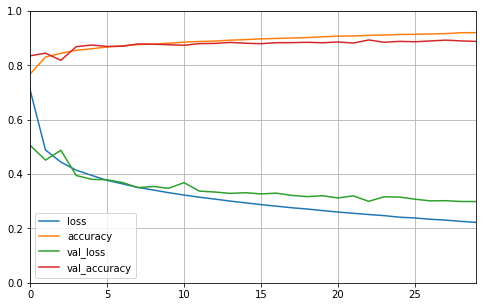

In [41]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluating the model

In [42]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 56.2348 - accuracy: 0.8560


[56.23482367858887, 0.856]

#### Making Predictions

In [0]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [45]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_pred = model.predict_classes(X_new)

In [47]:
y_pred

array([9, 2, 1])

In [48]:
y_test[:3]

array([9, 2, 1], dtype=uint8)